In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## load the data set
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Split the independtend and dependtent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
df.target.unique()

array([1, 0], dtype=int64)

In [5]:
# split the train and test data set
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 124 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 23.2 KB


In [19]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
## There is no null values in tran data set

In [9]:
X_test.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [22]:
## There is no null values in test data set

In [10]:
## Co-realtion check
X_train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.076955,-0.127758,0.288078,0.247557,0.121209,-0.165419,-0.404615,0.161146,0.204483,-0.151790,0.330450,0.081448
sex,-0.076955,1.000000,-0.057577,-0.110884,-0.212008,0.034951,-0.074695,-0.038822,0.151385,0.176680,-0.066913,0.169985,0.225652
cp,-0.127758,-0.057577,1.000000,0.025663,-0.072715,0.186225,-0.031449,0.317051,-0.390310,-0.165942,0.124755,-0.167850,-0.199712
trestbps,0.288078,-0.110884,0.025663,1.000000,0.146431,0.226035,-0.065109,-0.032537,0.071371,0.103757,-0.033806,0.058233,0.028320
chol,0.247557,-0.212008,-0.072715,0.146431,1.000000,0.051839,-0.118689,0.009340,0.039480,0.122876,0.014369,0.057201,0.060382
fbs,0.121209,0.034951,0.186225,0.226035,0.051839,1.000000,-0.098113,-0.013058,-0.020018,-0.002365,-0.074125,0.084714,-0.042658
restecg,-0.165419,-0.074695,-0.031449,-0.065109,-0.118689,-0.098113,1.000000,0.019833,0.002176,0.012953,0.018522,-0.082971,0.038891
thalach,-0.404615,-0.038822,0.317051,-0.032537,0.009340,-0.013058,0.019833,1.000000,-0.403342,-0.332174,0.323170,-0.260242,-0.110076
exang,0.161146,0.151385,-0.390310,0.071371,0.039480,-0.020018,0.002176,-0.403342,1.000000,0.326970,-0.284329,0.110556,0.236343
oldpeak,0.204483,0.176680,-0.165942,0.103757,0.122876,-0.002365,0.012953,-0.332174,0.326970,1.000000,-0.539355,0.235034,0.255085


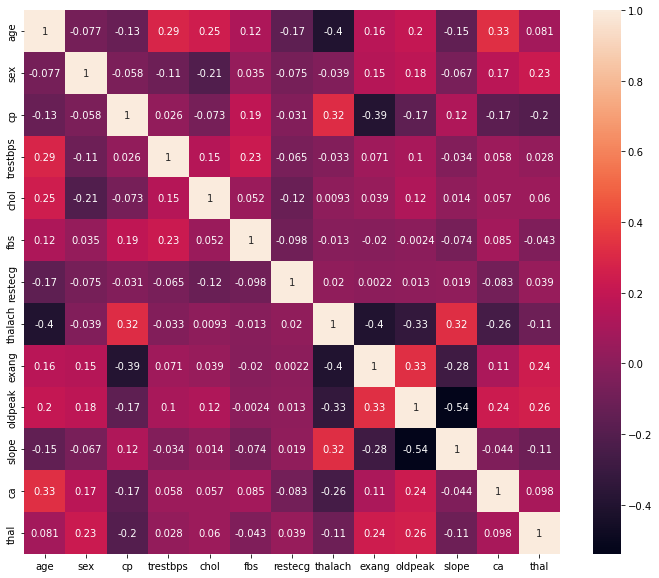

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [12]:
##Feature selection
def corr_relation(dataset,threshold):
    corrcolum=[]
    corrdataset=dataset.corr()
    for i in range(len(corrdataset.columns)):
        for j in range(i):
            if abs(corrdataset.iloc[i,j])>threshold:
                   columnname=corrdataset.columns[i]
                   corrcolum.append(columnname)
    return corrcolum

In [13]:
corr_relation(X_train,0.85)

[]

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [27]:
selector=VarianceThreshold()

In [28]:
selector.fit(X_train)

VarianceThreshold()

In [29]:
new_cols = selector.get_support()

In [30]:
X_train.iloc[:,new_cols]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [52]:
num_pipeline=Pipeline(
    steps=[
     ('scaler',StandardScaler())
    ]
)

In [53]:
numcolumn=X_train.columns

In [54]:
## column transfer
preprocessor=ColumnTransformer([
    ('numpipeline',num_pipeline,numcolumn)
])

In [59]:
X_train_scaler=preprocessor.fit_transform(X_train)
X_test_scaler=preprocessor.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
##accuracy
from sklearn.metrics import accuracy_score

In [44]:
## model creation
model={
    'Random forest': RandomForestClassifier()
}

In [70]:
evaluateamodel(X_train_scaler,X_test_scaler,y_train, y_test,model)

{'Random forest': 0.8021978021978022}

In [72]:
list(model.keys())[0]

'Random forest'

In [73]:
## Hyper paremater tuning
classifier=RandomForestClassifier()

In [74]:
parameter={
    'max_depth':[3,5,10,None],
    'n_estimators':[100,200,300],
    'criterion' : ["gini", "entropy"]
}

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
rcv=RandomizedSearchCV(classifier,parameter,cv=5,scoring='accuracy',verbose=3)

In [79]:
rcv.fit(X_train_scaler,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.952 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=100;, score=0.762 total time=   0.0s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [81]:
rcv.best_params_

{'n_estimators': 100, 'max_depth': 3, 'criterion': 'entropy'}

In [82]:
y_predictcv=rcv.predict(X_test_scaler)

In [83]:
accuracy_score(y_test,y_predictcv)

0.8351648351648352

In [84]:
classifier=RandomForestClassifier(n_estimators=100,max_depth=3,criterion='entropy',oob_score=True)

In [85]:
classifier.fit(X_train_scaler,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, oob_score=True)

In [86]:
y_predict_parm=classifier.predict(X_test_scaler)

In [87]:
accuracy_score(y_test,y_predict_parm)

0.8351648351648352

#### Default parmaeter we got 80 percent
#### after hyper parameter tuning we got 83 percent